<a href="https://colab.research.google.com/github/nikhilsinghh59/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading the machine learning packages
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import preprocessing


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [0]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [0]:
attrition_data.shape

(1028, 34)

In [0]:
attrition_data.Attrition.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

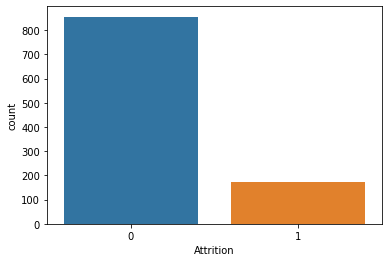

In [0]:
sns.countplot(x='Attrition' , data = attrition_data)
plt.show()

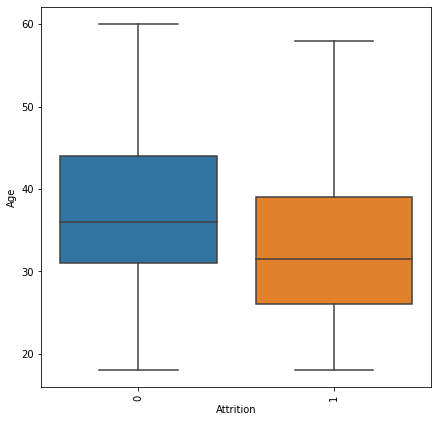

In [0]:
# Attrition vs Age

plt.figure(figsize=(7 , 7))

chart = sns.boxplot('Attrition' , 'Age' , data=attrition_data)
chart.set_xticklabels(
    chart.get_xticklabels() , 
    rotation=90
)
plt.show()

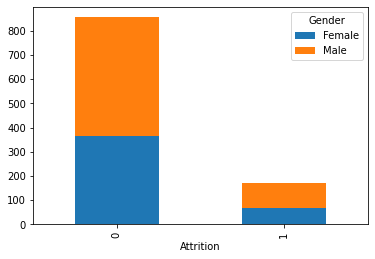

In [0]:
# Attrition vs Gender

ag = pd.crosstab(attrition_data.Attrition , attrition_data.Gender)

ag.plot.bar(stacked=True)
plt.legend(title='Gender')
plt.show()


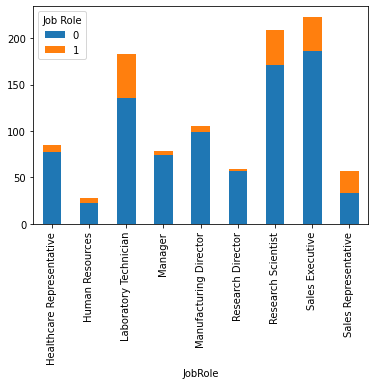

In [0]:
# Attrition vs Job

job = pd.crosstab(attrition_data.JobRole , attrition_data.Attrition)
job.plot.bar(stacked=True)
plt.legend(title='Job Role')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ac5a09470>,
      dtype=object)

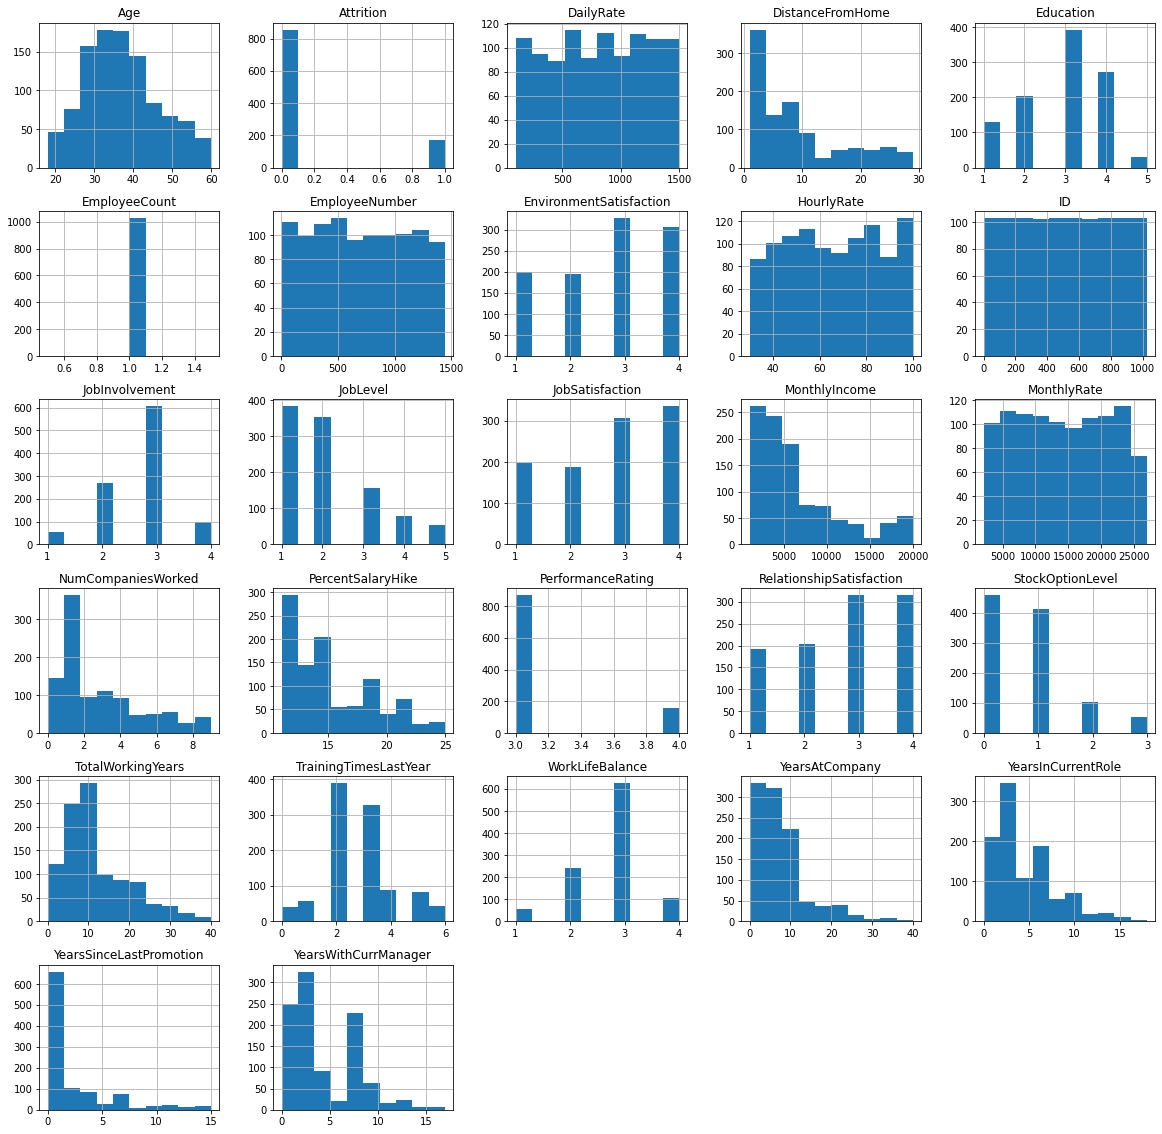

In [0]:
attrition_data.hist(figsize=(20,20))

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
## Now handlle the categorical data for model

# Extract columns with categorical values
cat_col = list(attrition_data.select_dtypes(include=['object']).columns)
print(cat_col)


['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [0]:
le = LabelEncoder()

for col in cat_col:
  attrition_data[col] = le.fit_transform(attrition_data[col])

In [0]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4


In [0]:
print(attrition_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1028 non-null   int64
 1   Attrition                 1028 non-null   int64
 2   BusinessTravel            1028 non-null   int64
 3   DailyRate                 1028 non-null   int64
 4   Department                1028 non-null   int64
 5   DistanceFromHome          1028 non-null   int64
 6   Education                 1028 non-null   int64
 7   EducationField            1028 non-null   int64
 8   EmployeeCount             1028 non-null   int64
 9   EmployeeNumber            1028 non-null   int64
 10  EnvironmentSatisfaction   1028 non-null   int64
 11  Gender                    1028 non-null   int64
 12  HourlyRate                1028 non-null   int64
 13  JobInvolvement            1028 non-null   int64
 14  JobLevel                  1028 non-null 

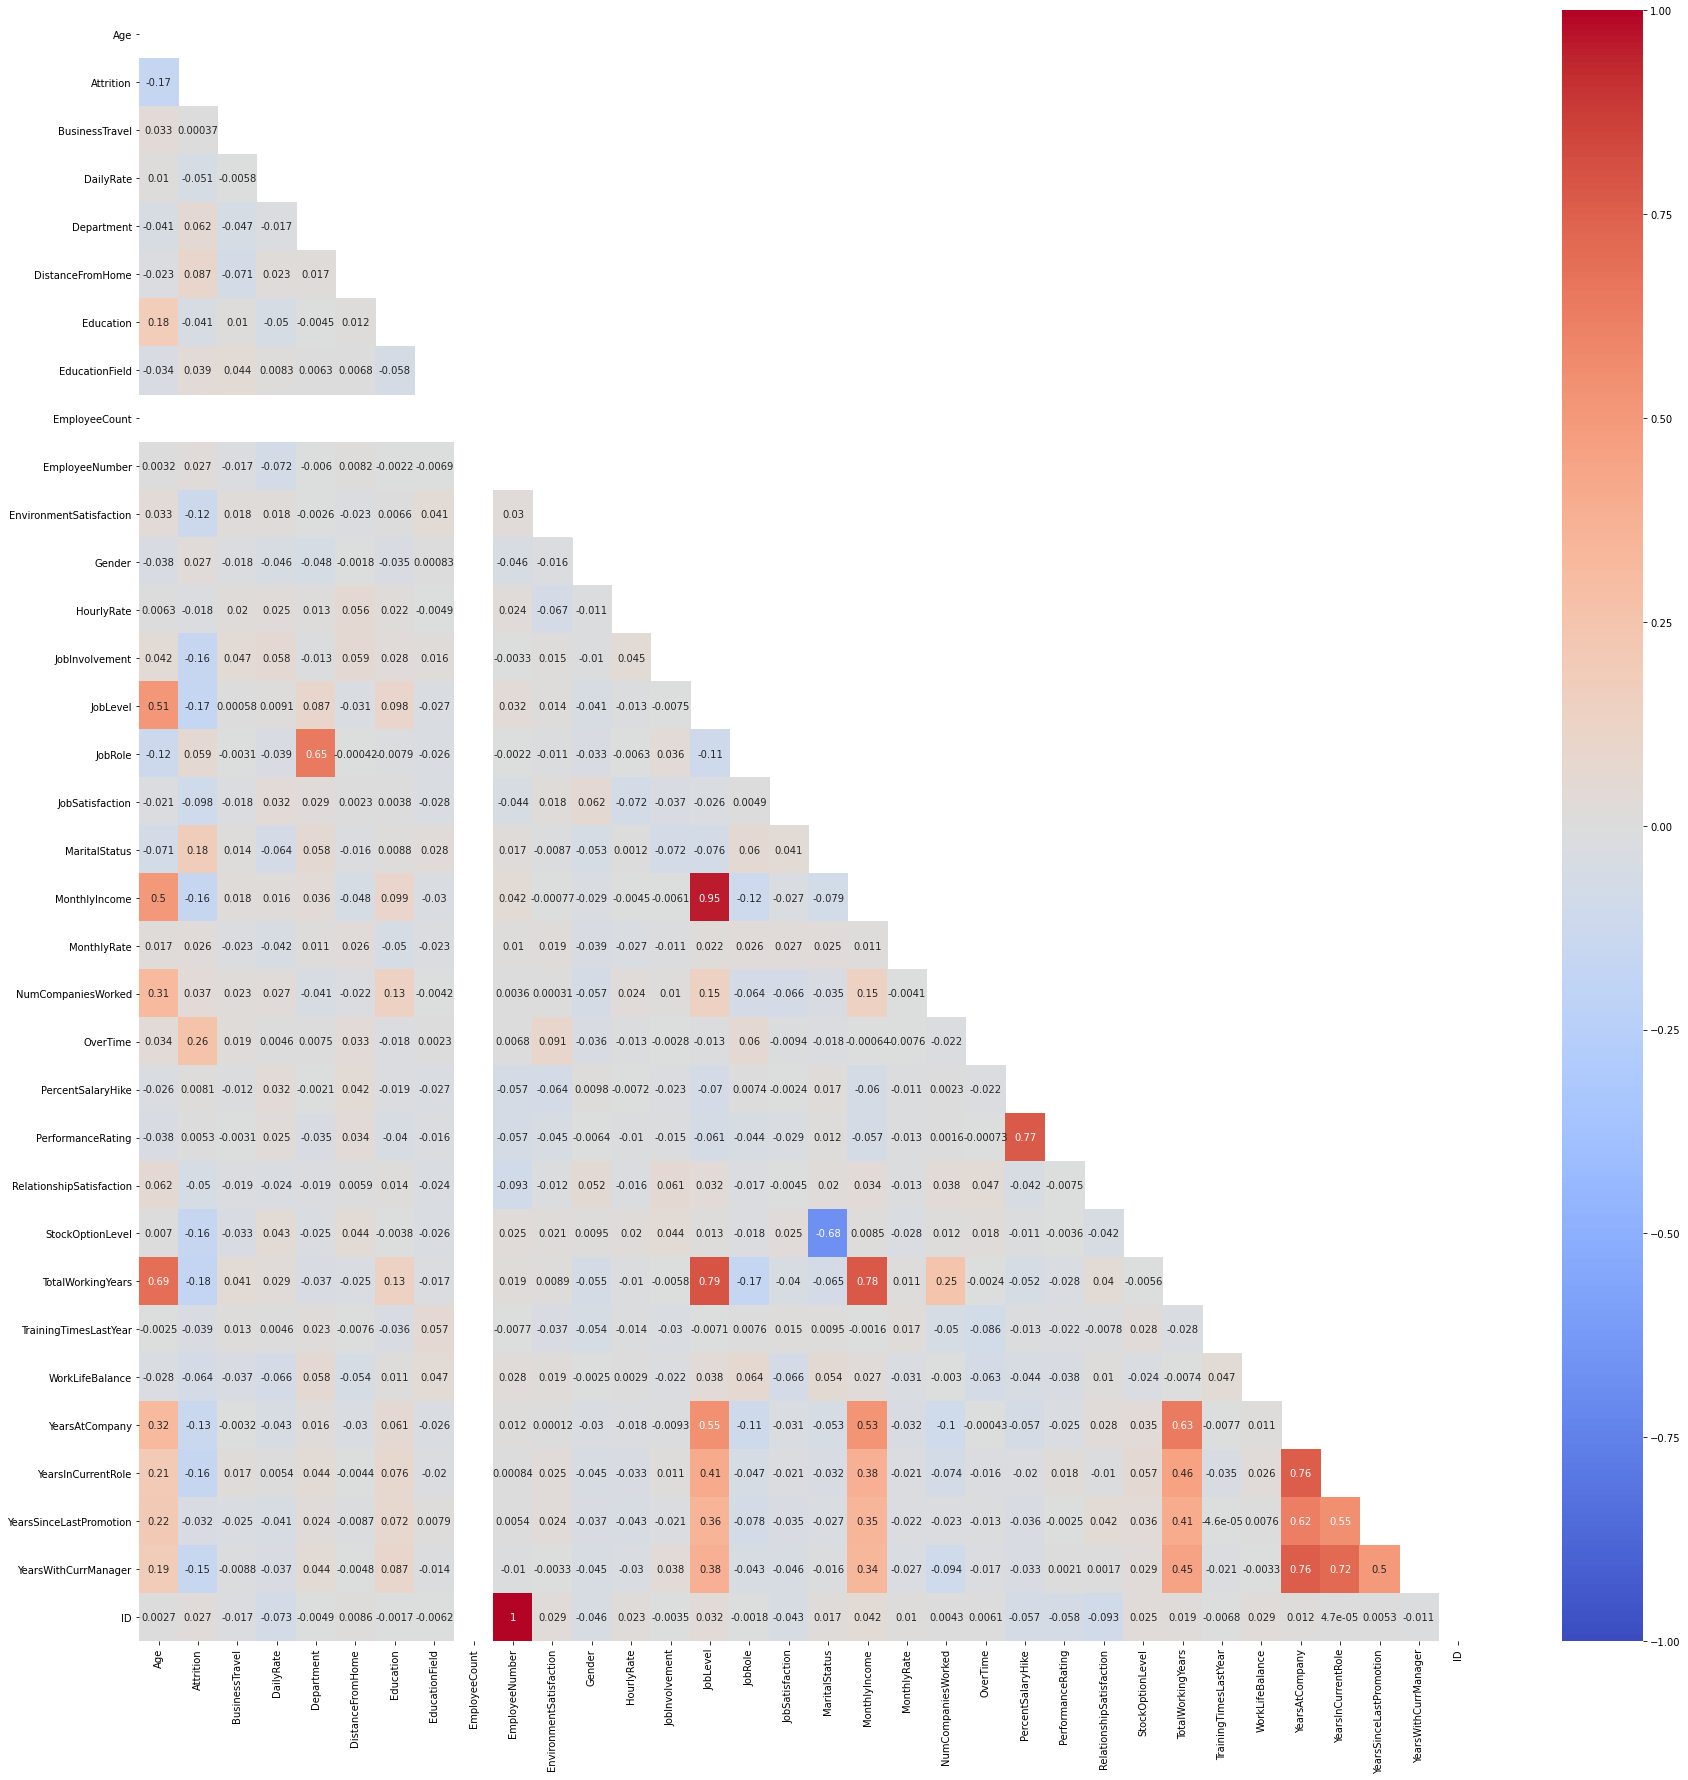

In [0]:
## Now printing the correlation matrix

plt.figure(figsize=(30,30))

mask = np.zeros_like(attrition_data.corr() , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr() ,
            vmin=-1 ,
            cmap = 'coolwarm' , 
            annot=True,
            mask=  mask)

plt.show()

In [0]:
attrition_data.drop(['EmployeeCount'] , axis=1 , inplace=True)

In [0]:
## splitting of data

Y = attrition_data['Attrition']
X = attrition_data.drop(['Attrition'] , axis=1)

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , train_size=0.80, random_state=123)


In [0]:
print(X_train.shape)
print(X_test.shape)

(822, 32)
(206, 32)


In [0]:
# scaling the data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


In [0]:
model_name = {0: 'Logistic Regression' , 
          1 : 'Randomforest Classifier' , 
          2 :'K Nearest Neighbours', 
          3 : 'XGBoost',
          4 : 'ADABoost'
          }

In [0]:
def model_performance(model , X_test , Y_test):

  predictions = model.predict(X_test)
  accuracy = accuracy_score(Y_test , predictions)
  print(confusion_matrix(Y_test , predictions))
  print("="*60)
  print(classification_report(Y_test , predictions))



In [0]:
def models_building(X_train , Y_train , model_name , X_test , Y_test):

  i=0
  # Logistic Regression model
  print("Peformance of model " , model_name[i])
  lr = LogisticRegression()
  lr.fit(X_train , Y_train)

  model_performance(lr , X_test , Y_test)
  i+=1

  #model.append(lr)

  # Random Forest Classifier
  print("Peformance of model " , model_name[i])
  rf_class = RandomForestClassifier()
  rf_class.fit(X_train , Y_train)

  model_performance(rf_class , X_test , Y_test)

  i+=1

  #model.append(rf_class)

  # knn classifier
  print("Peformance of model " , model_name[i])
  knn = KNeighborsClassifier(n_neighbors=11)
  knn.fit(X_train , Y_train)

  model_performance(knn , X_test , Y_test)

  i+=1

  #model.append(knn)

  # Xg boost
  print("Peformance of model " , model_name[i])
  xgb_class = XGBClassifier()
  xgb_class.fit(X_train , Y_train)

  model_performance(xgb_class , X_test , Y_test)

  i+=1

  #model.append(xgb_class)

  # Adaboost Classifier
  print("Peformance of model " , model_name[i])
  ada = AdaBoostClassifier(learning_rate = 1)
  ada.fit(X_train , Y_train)

  model_performance(ada , X_test , Y_test)

  i+=1

  #model.append(ada)

  return

In [0]:
models_building(X_train , Y_train , model_name , X_test , Y_test)

Peformance of model  Logistic Regression
[[165   7]
 [ 25   9]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       172
           1       0.56      0.26      0.36        34

    accuracy                           0.84       206
   macro avg       0.72      0.61      0.64       206
weighted avg       0.82      0.84      0.82       206

Peformance of model  Randomforest Classifier
[[171   1]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       172
           1       0.80      0.12      0.21        34

    accuracy                           0.85       206
   macro avg       0.83      0.56      0.56       206
weighted avg       0.84      0.85      0.80       206

Peformance of model  K Nearest Neighbours
[[171   1]
 [ 33   1]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       172
           1       0.50      0.03      0